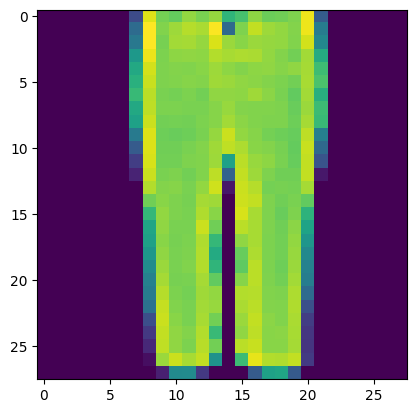

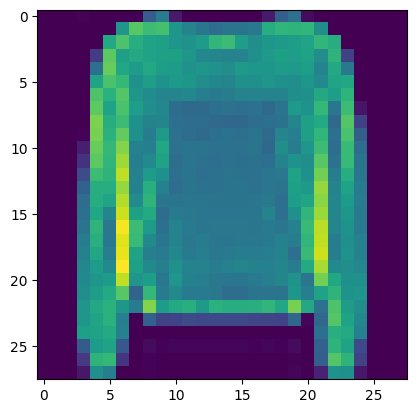

Epoch 1/3
1875/1875 [==============================] - 232s 123ms/step - loss: 0.6211 - accuracy: 0.8335 - val_loss: 0.4197 - val_accuracy: 0.8542
Epoch 2/3
1875/1875 [==============================] - 224s 120ms/step - loss: 0.3312 - accuracy: 0.8802 - val_loss: 0.3469 - val_accuracy: 0.8749
Epoch 3/3
1875/1875 [==============================] - 222s 118ms/step - loss: 0.2822 - accuracy: 0.8981 - val_loss: 0.3594 - val_accuracy: 0.8799


In [3]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Flatten
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

nc = 10 # Number of classes



#This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, 
#along with a test set of 10,000 images. This dataset can be used as a drop-in 
#replacement for MNIST.
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

Xtrain=Xtrain.reshape(60000,28,28,1)
Xtest=Xtest.reshape(10000,28,28,1)

ytrainEnc=tf.one_hot(ytrain,depth=nc)
ytestEnc=tf.one_hot(ytest,depth=nc)

model=Sequential()
model.add(Conv2D(64, input_shape=(28,28,1), kernel_size=3, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(Xtrain, ytrainEnc, validation_data=(Xtest, ytestEnc), epochs=3)